In [54]:
# !pip install langgraph

In [55]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END


In [56]:
class AgentState(TypedDict):
    number1 : int
    operator : str
    number2 : int
    final_number : int

In [57]:
def addition(state : AgentState)->AgentState:
  "this node adds the two numbers "
  state["final_number"]=state["number1"]+state["number2"]
  return state
def subtraction(state:AgentState)->AgentState:
  "this node subtracts the two numbers"
  state["final_number"]=state["number1"]-state["number2"]
  return state

def decide_next_node(state:AgentState)->AgentState:
  "this node selects the next node in the graph"
  if state["operator"] == "+":
    return "addition_operator"
  elif state["operator"] == "-":
    return "subtraction_operator"


In [58]:
graph = StateGraph(AgentState)
graph.add_node("add_node",addition)
graph.add_node("subtract_node",subtraction)
graph.add_node("router",lambda state:state)  #passthrough function

graph.add_edge(START,"router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        # Edge: Node
        "addition_operator":"add_node",
        "subtraction_operator":"subtract_node"
    }
)
graph.add_edge("add_node",END)
graph.add_edge("subtract_node",END)
app=graph.compile()

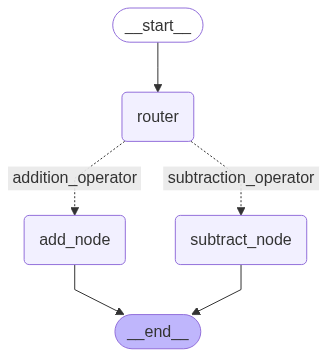

In [59]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [60]:
initial_state_2 = {"number1": 10, "operator": "-", "number2": 5}
print(app.invoke(initial_state_2))

{'number1': 10, 'operator': '-', 'number2': 5, 'final_number': 5}
